In [ ]:
pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.3 MB/s eta 0:00:00


In [ ]:
import pygad

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
hyper_params = {
    "criterion" : ["gini", "entropy", "log_loss"], #3
    "max_depth": range(3, 60), #57
    "min_samples_leaf": range(3, 60), #57
}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data = load_iris()

X = data.data
Y = data.target

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 13)

In [ ]:
Y_train.shape

(105,)

In [ ]:
def params_from_genome(genome):
  return {
    "criterion" : ["gini", "entropy", "log_loss"][int(genome[0])],
    "max_depth": int(genome[1]),
    "min_samples_leaf": int(genome[2])
  }

In [ ]:
def my_fitness_func(ga_instance, genome, solution_idx):
  model = DecisionTreeClassifier(**params_from_genome(genome), random_state=13)
  model.fit(X_train, Y_train)

  y_pred = model.predict(X_test)
  return accuracy_score(Y_test, y_pred)

In [ ]:
ga_config = {
    "num_generations": 100,
    "num_parents_mating": 8,
    "num_genes": 3,
    'sol_per_pop': 8,
    "gene_space": [
        {'low': 0, 'high': 2},
        {'low': 3, 'high': 60},
        {'low': 3, 'high': 60}
    ],
    'parent_selection_type': 'sss',
    'crossover_type': 'single_point',
    'mutation_type': 'random',
    'mutation_probability': 0.25,
    'fitness_func': my_fitness_func
}

In [ ]:
ga_instance = pygad.GA(**ga_config)

In [ ]:
ga_instance.run()

In [ ]:
best_solution = ga_instance.best_solution()

In [ ]:
best_solution

(array([ 0.41007571, 16.4084335 , 30.42338004]),
 np.float64(0.9555555555555556),
 np.int64(0))

/usr/local/lib/python3.11/dist-packages/pygad/visualize/plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


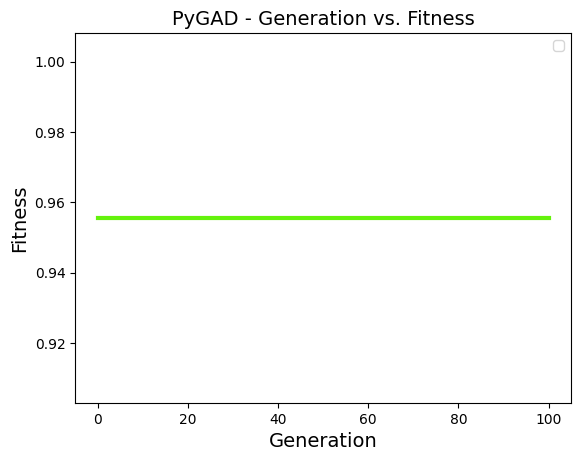

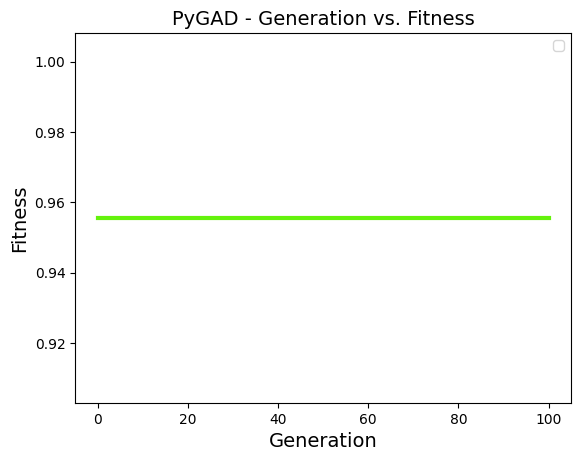

In [ ]:
ga_instance.plot_fitness()